# INDICACIONES

1) Cada uno debe completar las consignas indicadas en este notebook.

2) Deben postear como solución enlace a su notebook colab público y también debe estar en su repositorio GitHub.

3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# ** DESAFIO REGRESION **

## MATERIA: Aprendizaje automático 1  / ISSD / Tecnicatura Ciencia de Datos e Inteligencia Artificial

## PROFESORA: Ing. Ana Diedrichs

## ALUMNO: Marcos Gallo


# Dataset

Genere un dataset sintético con al menos 4 variables y una variable continua para usarlo luego en regresión.



In [16]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression

# Generamos un dataset sintético con 5 variables independientes y una variable dependiente continua
X, y = make_regression(n_samples=500, n_features=5, noise=8, random_state=5)

# Convertimos a DataFrame para facilidad de manipulación y visualización
df = pd.DataFrame(X, columns=[f'Variable_{i+1}' for i in range(5)])
df['Target'] = y

print(df.head())


   Variable_1  Variable_2  Variable_3  Variable_4  Variable_5      Target
0   -0.556664    0.374516   -1.223636   -0.653156   -0.299413 -154.161800
1   -0.469809   -1.021022   -1.737921   -2.509235   -0.466481 -273.175257
2    0.731105   -1.837076    0.858130    0.171956    0.919616  152.340306
3    0.139980    0.403919    0.218170    1.343061   -0.684795   24.545955
4   -0.774086    1.603678   -1.422607    0.141676   -1.106673 -188.633352


### Generación de los datos:
Importo las librerias que necesitaré y creo un dataset utilizando la función "make_regression de sklearn.datasets", la cual permite generar datasets sintéticos para pruebas y experimentos en modelos de regresión. Esta función devuelve dos arrays: X para las características independientes e y para la variable de respuesta (target).

Configuro la forma del dataset a través de los parámetros:
- n_samples=500: Especifica que el dataset debe tener 500 muestras (filas).
- n_features=5: Define que se generarán 5 variables independientes (columnas en X).
- noise: Añade ruido al dataset, para que el modelo sea más realista y no perfectamente lineal. Este parámetro controla la cantidad de desviación aleatoria en y.
- random_state: Establece una semilla para la generación de números aleatorios, asegurando que los resultados sean reproducibles cada vez que se ejecuta el código.


Matriz de Correlación:
            Variable_1  Variable_2  Variable_3  Variable_4  Variable_5  \
Variable_1    1.000000   -0.012914    0.044334   -0.011678    0.018412   
Variable_2   -0.012914    1.000000   -0.016550   -0.020411   -0.004241   
Variable_3    0.044334   -0.016550    1.000000    0.050425   -0.010650   
Variable_4   -0.011678   -0.020411    0.050425    1.000000    0.010071   
Variable_5    0.018412   -0.004241   -0.010650    0.010071    1.000000   
Target        0.541166    0.120734    0.480528    0.290544    0.639087   

              Target  
Variable_1  0.541166  
Variable_2  0.120734  
Variable_3  0.480528  
Variable_4  0.290544  
Variable_5  0.639087  
Target      1.000000  


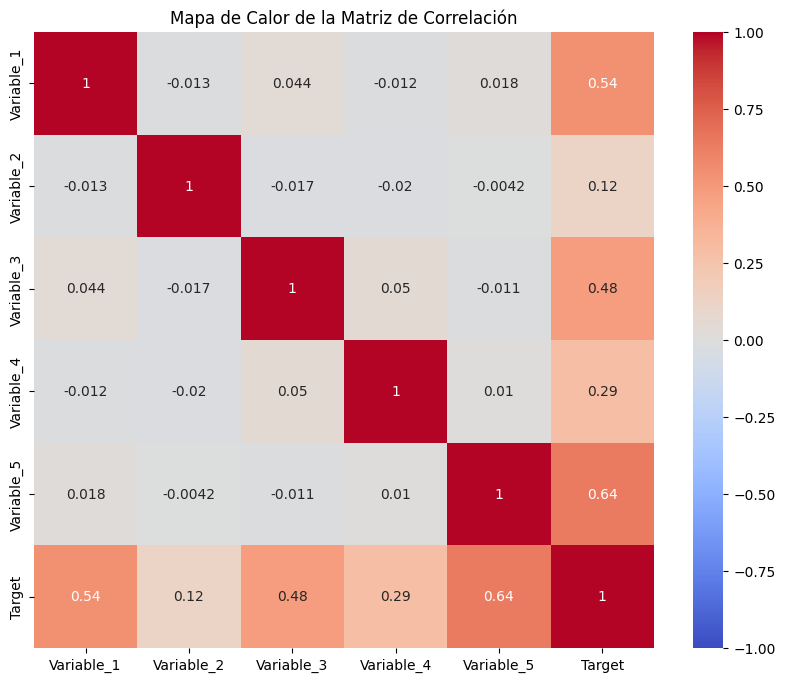

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculamos la matriz de correlación para tener una noción de la relación entre las variables generadas.
correlation_matrix = df.corr()

# Mostramos la matriz de correlación en forma de tabla
print("Matriz de Correlación:")
print(correlation_matrix)

# Visualización de la matriz de correlación como mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Mapa de Calor de la Matriz de Correlación")
plt.show()


### Preprocesamiento

Para entrenar modelos de regresión con estos datos, hay algunos pasos de preprocesamiento clave para asegurar que el modelo aprenda patrones relevantes y no se vea afectado por problemas en el dataset:

- **Revisar la existencia de valores faltantes** (En este caso al generar un dataset sintético no habrá valores faltantes): Se hará la verificación a modo de ejemplo, si hubiere valores faltantes debería tratárselos.
- **Escalado de características**: Normalizar o estandarizar las variables, ya que muchas técnicas de regresión son sensibles a las escalas de las variables. Usaré "StandardScaler" de "sklearn.preprocessing" para estandarizar las variables independientes, es decir, llevarlas a una media de 0 y desviación estándar de 1. Esto es útil para que todas las variables contribuyan de manera equitativa en el modelo y evita que las variables con mayores valores dominen el aprendizaje.
- **División de datos**: Se dividirán los datos en conjuntos de entrenamiento y prueba para evaluar el rendimiento del modelo. Usaré "train_test_split" para dividir el dataset en conjuntos de entrenamiento y prueba, reservando el 80% para entrenamiento y el 20% para prueba, que son proporciones normalmente utilizadas que el modelo generalice bien datos no vistos.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Verificación de la existencia de valores faltantes
print("Valores faltantes por columna:")
print(df.isnull().sum())

# Se divide el dataset en 80% para entrenamiento y 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=94)

# Escalado de características:

scaler = StandardScaler()

# Se aplica el escalador a las variables independientes
X_scaled = scaler.fit_transform(df.drop(columns='Target'))
X_test = scaler.transform(X_test)

# Se definen las variables dependiente e independientes
X = X_scaled
y = df['Target'].values



# Muestro la forma del resultado
print("Datos de entrenamiento:", X_train.shape, y_train.shape)
print("Datos de prueba:", X_test.shape, y_test.shape)


Valores faltantes por columna:
Variable_1    0
Variable_2    0
Variable_3    0
Variable_4    0
Variable_5    0
Target        0
dtype: int64
Datos de entrenamiento: (400, 5) (400,)
Datos de prueba: (100, 5) (100,)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Modelos

Elegiré el modelo estándar de regresión lineal multiple y luego los modelos de regularización Ridge y Lasso para comparar cual se adapta mejor a este conjunto de datos.

### **LinearRegression()**

Este modelo de regresión lineal ordinaria minimiza el error cuadrático medio entre los valores predichos y reales sin aplicar ninguna regularización. No tiene hiperparámetros ajustables, el modelo ajusta automáticamente los coeficientes para que minimicen el error entre los valores predichos y observados.

### **Regresión Ridge**

Este modelo agrega una penalización

$$
\alpha \sum_{j=1}^{n} \beta_j^2
$$

al error cuadrático, ayudando a reducir el tamaño de los coeficientes y mitigar el sobreajuste.

**Hiperparámetro principal**:

Alpha, que controla la fuerza de la regularización. Un valor alto de alpha reduce el tamaño de los coeficientes, mientras que un valor cercano a 0 permite que los coeficientes crezcan. He elegido un valor moderado de 1 sabiendo que puede ajustarse de acuerdo a la necesidad de regularización.

### **Regresión Lasso**

Similar a Ridge, pero agrega una penalización basada en el valor absoluto de los coeficientes

$$
\alpha \sum_{j=1}^{n} |\beta_j|
$$

lo que permite que algunos coeficientes se reduzcan a cero, eliminando características innecesarias.

**Hiperparámetro principal**:

Alpha, similar a Ridge, controla el nivel de penalización. A valores más altos, mayor penalización y mayor reducción de los coeficientes. En este caso el valor elegido para alpha es de 0,1 ya que en este modelo es mas "potente" la regularización.



In [20]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_squared_error

# 1. Entrenamiento del modelo de Regresión Lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Mostramos los coeficientes del modelo entrenado
print(f"Coeficientes del modelo Linear Regresion: {linear_model.coef_}")
print(f"Intercepto del modelo Linear Regresion: {linear_model.intercept_}")



# 2. Definimos los hiperparámetros para ambos modelos
alpha_ridge = 1.0  # Hiperparámetro de regularización para Ridge
alpha_lasso = 0.1  # Hiperparámetro de regularización para Lasso


# 3. Entrenamiento del modelo Ridge
ridge_model = Ridge(alpha=alpha_ridge)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Mostramos los coeficientes del modelo entrenado
print(f"Coeficientes del modelo Ridge: {ridge_model.coef_}")
print(f"Intercepto del modelo Ridge: {ridge_model.intercept_}")



# 4. Entrenamiento del modelo Lasso
lasso_model = Lasso(alpha=alpha_lasso)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)


# Mostramos los coeficientes del modelo entrenado
print(f"Coeficientes del modelo Lasso: {lasso_model.coef_}")
print(f"Intercepto del modelo Lasso: {lasso_model.intercept_}")




Coeficientes del modelo Linear Regresion: [68.26808726 18.73810413 58.74731442 34.24965993 83.70998092]
Intercepto del modelo Linear Regresion: 0.6860840717821115
Coeficientes del modelo Ridge: [68.10361221 18.68146933 58.61395231 34.17667677 83.50364726]
Intercepto del modelo Ridge: 0.6777090652963782
Coeficientes del modelo Lasso: [68.17034376 18.6261764  58.65480789 34.15506458 83.61479021]
Intercepto del modelo Lasso: 0.6825892317890965


Puede observarse aquí que estos resultados muestran los coeficientes e interceptos de los tres modelos de regresión: Regresión Lineal, Ridge y Lasso.


Cada coeficiente representa la influencia de una característica en el valor objetivo. En este caso, la quinta característica tiene el mayor coeficiente (83.71), lo que sugiere que podría ser la variable más influyente.

El intercepto es el valor de la variable dependiente cuando todas las características son cero.

El modelo de **Regresión lineal** no tiene regularización, por lo que puede ser más susceptible a sobreajustarse en comparación con Ridge y Lasso. Los coeficientes de este modelo pueden fluctuar más en respuesta a cambios en los datos.

**Ridge** aplica una regularización L2 que penaliza los coeficientes grandes. Esto reduce ligeramente los valores de los coeficientes en comparación con la regresión lineal, especialmente en características que no aportan tanto al modelo.

Ridge ayuda a evitar el sobreajuste al reducir los coeficientes, pero no los lleva a cero. Los coeficientes de Ridge son ligeramente menores en comparación con la regresión lineal, lo que indica que el modelo da menos peso a cada característica para evitar sobreajustarse.

**Lasso** aplica una regularización L1, que puede llevar algunos coeficientes a cero, eliminando características irrelevantes. En este caso, no ha reducido a cero ninguno de los coeficientes, sólo ha ajustado sus valores levemente en comparación con los otros modelos.

Como Lasso no ha eliminado ninguna característica y apenas a ajustado sus valores ligeramente sugiere que todas las características podrían aportar valor al modelo.

## Evaluación

Evalue el desempeño de los modelos indicando las métricas, metodología y conjunto de datos utilizados.

In [21]:
from sklearn.model_selection import cross_val_score

# Definimos una función para evaluar los modelos
def evaluate_model(model, X, y):
    # Cálculo del MSE
    mse = mean_squared_error(y_test, model.predict(X_test))

    # Cálculo del R²
    r_squared = model.score(X_test, y_test)

    return mse, r_squared

# Evaluación de modelos con validación cruzada
models = {
    "Regresión Lineal": LinearRegression(),
    "Ridge": Ridge(alpha=alpha_ridge),
    "Lasso": Lasso(alpha=alpha_lasso),
}

for name, model in models.items():
    # Realizamos la validación cruzada con 5 folds
    cv_mse = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    model.fit(X_train, y_train)  # Entrenamos el modelo en el conjunto de entrenamiento
    mse, r_squared = evaluate_model(model, X, y)

    print(f"{name}:")
    print(f"  MSE (Validación Cruzada): {-cv_mse.mean():.4f}")
    print(f"  MSE (Test): {mse:.4f}")
    print(f"  R²: {r_squared:.4f}\n")


Regresión Lineal:
  MSE (Validación Cruzada): 67.5117
  MSE (Test): 74.5424
  R²: 0.9949

Ridge:
  MSE (Validación Cruzada): 67.6590
  MSE (Test): 73.2036
  R²: 0.9950

Lasso:
  MSE (Validación Cruzada): 67.5903
  MSE (Test): 74.0689
  R²: 0.9949



### ANÁLISIS DE LOS VALORES ARROJADOS POR LAS MÉTRICAS EN LA EVAUACIÓN

Estos resultados corresponden a tres modelos de regresión (Lineal, Ridge y Lasso), evaluados usando el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R²) en los conjuntos de Validación Cruzada y Test.

#### **Error Cuadrático Medio (MSE)**

El MSE mide el promedio de los cuadrados de los errores, es decir, la diferencia entre los valores predichos y los valores reales. Un MSE bajo indica que las predicciones del modelo están cerca de los valores reales.


**Regresión Lineal**: El MSE de validación cruzada es 67.5117, y el MSE en el conjunto de prueba es ligeramente más alto, 74.5424. Esto indica que el modelo funciona bien tanto en el entrenamiento como en la prueba, aunque su rendimiento en prueba es un poco menos preciso.

**Ridge**: El MSE en validación cruzada es 67.6590 y el de prueba es 73.2036, aún menor que el de la regresión lineal en el conjunto de prueba. Esto sugiere que Ridge, con regularización, maneja mejor los datos de prueba y puede ser menos propenso al sobreajuste.

**Lasso**: Con un MSE en validación cruzada de 67.5903 y el de prueba de 74.0689, es similar al modelo de regresión lineal, pero con una ligera mejora en generalización debido a la regularización L1.

Es evidente que ños valores de MSE son bastante cercanos entre los modelos, lo cual indica que todos se ajustan bien al conjunto de datos. Sin embargo, Ridge muestra un ligero ajuste en el conjunto de prueba que los destaca del resto.

#### **Coeficiente de Determinación (R²)**

Este coeficiente R² mide la proporción de la varianza en la variable dependiente que es explicada por las variables independientes del modelo.

Un valor de R² cercano a 1 indica un ajuste excelente, ya que el modelo explica casi toda la variabilidad de los datos.

Para los tres modelos, el valor de R² está alrededor de 0.995, lo que indica que todos los modelos explican aproximadamente el 99.5% de la varianza de los datos, un excelente resultado. En datasets formados por datos tomados de situaciones reales es muy dificil que se llegue a estos resultados de exactitud en las métricas.


Estos resultados indican que cualquiera de los tres modelos puede ser efectivo, pero Ridge parece ser la mejor elección, con una capacidad de generalización ligeramente superior.


## Ejercicio de hiper parámetro tunning.

Modificar uno de los modelos para probarlo con diferentes valores para uno de sus hiperparámetros, indicando para cuáles se evidencia subajuste y en cuáles sobreajuste.

Grafique la métrica de desempeño vs los valores del hiperarámetro para observar ambas curvas de error durante el entrenamiento y durante el testeo.




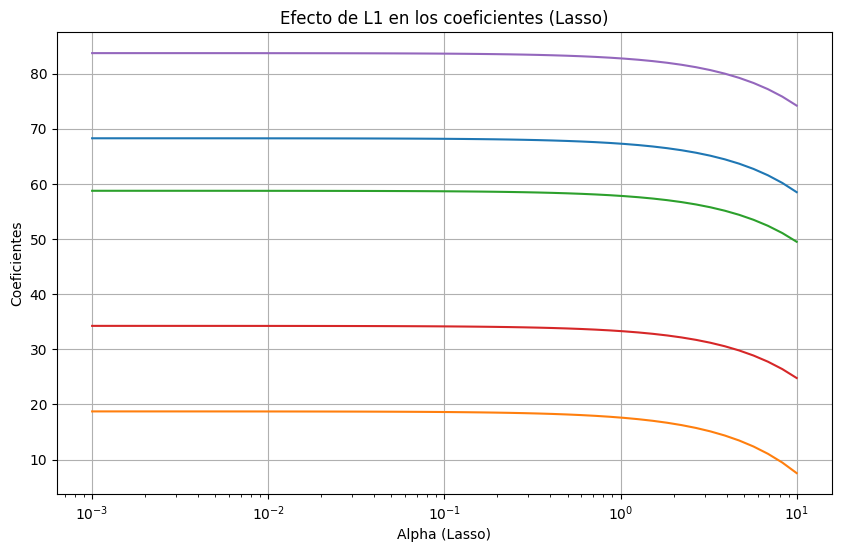

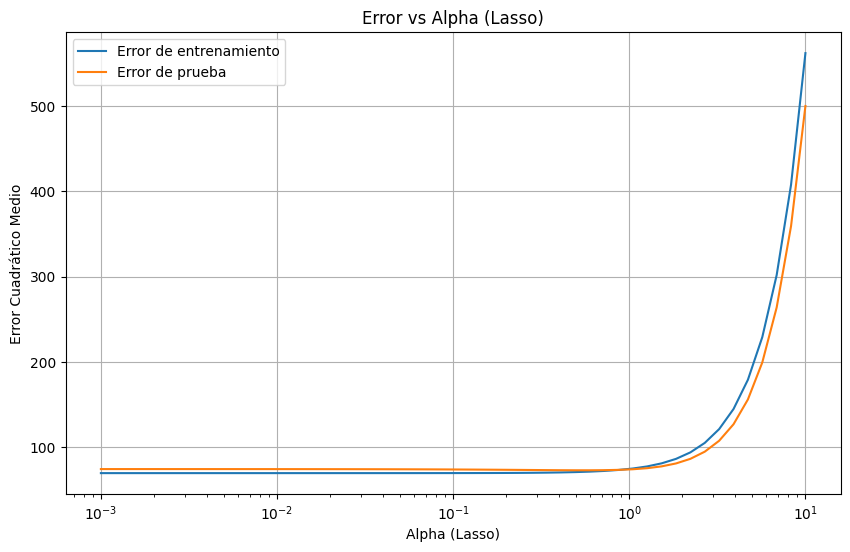

In [22]:
#Se crea un rango de valores de alpha usando "np.logspace" para explorar cómo el hiperparámetro afecta al modelo de Lasso
#en pasos posteriores. Aquí, coef_lasso almacena los coeficientes del modelo Lasso para diferentes alphas, y
#train_errors_lasso y test_errors_lasso guardarán los errores cuadráticos medios en los conjuntos de entrenamiento y prueba.

alphas = np.logspace(-3, 1, 50)
coef_lasso = []
train_errors_lasso = []
test_errors_lasso = []

# Probar diferentes valores de alpha
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)

    # Guardar coeficientes
    coef_lasso.append(lasso.coef_)

    # Calcular errores
    train_errors_lasso.append(mean_squared_error(y_train, lasso.predict(X_train)))
    test_errors_lasso.append(mean_squared_error(y_test, lasso.predict(X_test)))

# Convertir los coeficientes a numpy para poder graficar
coef_lasso = np.array(coef_lasso)

# Graficar coeficientes
plt.figure(figsize=(10, 6))
plt.plot(alphas, coef_lasso)
plt.xscale('log')
plt.xlabel('Alpha (Lasso)')
plt.ylabel('Coeficientes')
plt.title('Efecto de L1 en los coeficientes (Lasso)')
plt.grid(True)
plt.show()

# Graficar errores
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_errors_lasso, label='Error de entrenamiento')
plt.plot(alphas, test_errors_lasso, label='Error de prueba')
plt.xscale('log')
plt.xlabel('Alpha (Lasso)')
plt.ylabel('Error Cuadrático Medio')
plt.title('Error vs Alpha (Lasso)')
plt.legend()
plt.grid(True)
plt.show()

Se ajustó el modelo de regresión Lasso utilizando diferentes valores del hiperparámetro alpha para evaluar cómo afecta a los coeficientes del modelo y al error cuadrático medio en los conjuntos de entrenamiento y prueba.

-
#### **Gráfico de Coeficientes vs Alpha (Lasso):**

En este gráfico, cada línea representa un coeficiente de una característica, y el eje x muestra diferentes valores de alpha en escala logarítmica.
A medida que alpha aumenta, la regularización L1 de Lasso tiende a reducir algunos coeficientes hasta llegar a cero. Esto significa que el modelo está eliminando características menos relevantes, lo cual es útil para simplificar el modelo y reducir el sobreajuste.

**Alpha bajo**: Para valores pequeños de alpha, los coeficientes tienden a mantenerse en valores altos, indicando que el modelo está capturando casi toda la varianza de los datos, pero podría estar sobreajustando.

**Alpha alto**: A medida que aumenta alpha, varios coeficientes se reducen o se vuelven cero, indicando que el modelo está simplificando las relaciones entre variables, lo que puede llevar a subajuste si demasiados coeficientes se eliminan.

-
#### **Gráfico de Error vs Alpha (Lasso)**:

Este gráfico muestra cómo cambia el Error Cuadrático Medio en los conjuntos de entrenamiento y prueba a medida que varía el hiperparámetro alpha.

**Alpha bajo**: En este caso, el error en el conjunto de entrenamiento es bajo, pero el error en el conjunto de prueba puede ser más alto (es muy leve en este ejemplo), lo cual sugiere sobreajuste. Esto sucede porque el modelo está capturando incluso pequeñas variaciones de los datos de entrenamiento.

**Alpha medio**: A medida que aumentamos alpha, el error en el conjunto de prueba disminuye, indicando que el modelo está comenzando a generalizar mejor, ya que los coeficientes se están regularizando de manera óptima.

**Alpha alto**: Con valores altos de alpha, tanto el error en el conjunto de entrenamiento como el de prueba tienden a aumentar, lo que indica subajuste. En este punto, el modelo está demasiado simplificado y no logra captar la relación entre las características y el objetivo.

-

**Rango Óptimo de Alpha**: Los valores intermedios de alpha son los más adecuados, ya que permiten que el modelo mantenga un buen rendimiento tanto en entrenamiento como en prueba, logrando un balance entre el ajuste y la generalización.

#### **Fuentes de consulta:**


- Validación cruzada y búsqueda de hiperparametros https://www.youtube.com/watch?v=WHcEg4HXsH4
- Bibliografía de la materia Aprendizaje automático. Profesora Ana Diedrichs
- Prompt de ChatGPT: "porque luego de la generacion de datasets sinteticos para entranamiento de modelos de regresion obtengo valores de métricas muy elevados en desempeño?."
- Prompt de ChatGPT: " Como puedo ajustar la generacion del dataset sintetico para que los resultados sean menos exactos en la evaluacion del modelo?"
- Prompt en sider fusion: ¿Como generar datasets sinteticos en python?
- Videos youtube del canal de Pharu Analytics
- Scikit-learn: https://scikit-learn.org/stable/documentation.html
